In [1]:
#!pip install tflearn

In [2]:
#Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [3]:
np.random.seed(1000)

#Get data
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
x,y= oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [5]:
x.shape, y.shape

((1360, 224, 224, 3), (1360, 17))

In [7]:
import matplotlib.pyplot as plt

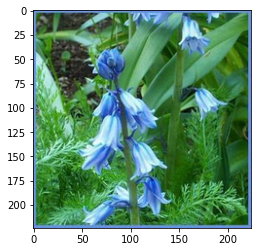

In [8]:
plt.imshow(x[6])

In [9]:
#Sequential model
model=Sequential()

#1st convolutional layer
model.add(Conv2D(filters=96, input_shape=(224, 224, 3), kernel_size=(11, 11), strides=(4, 4), padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
#Batch normalization before passing it to next layer
model.add(BatchNormalization())

#2nd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
#Batch normalization 
model.add(BatchNormalization())

#3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
#Batch normalization before passing it to next layer
model.add(BatchNormalization())

#4th convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
#Batch normalization before passing it to next layer
model.add(BatchNormalization())

#5th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
#Batch normalization 
model.add(BatchNormalization())

#Passing it to a dense layer
model.add(Flatten())
#1st dense layer
model.add(Dense(4096, input_shape=(224*224*3, )))
model.add(Activation('relu'))
#Add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch normalization
model.add(BatchNormalization())

#2nd dense layer
model.add(Dense(4096))
model.add(Activation('relu'))
#Add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch normalization
model.add(BatchNormalization())
          
#3rd dense layer
model.add(Dense(1000))
model.add(Activation('relu'))
#Add dropout to prevent overfitting
model.add(Dropout(0.4))
#Batch normalization
model.add(BatchNormalization())

#Output layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
__________________________________________________

In [10]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
model.fit(x, y, batch_size=64, epochs=1, verbose=1, validation_split=0.2, shuffle=True)
#shuffle for shuffling the data in batches

Train on 1088 samples, validate on 272 samples
1088/1088 [==============================] - ETA: 0s - loss: 3.0406 - acc: 0.2233

C:\Users\Jerish\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 43s 39ms/sample - loss: 3.0406 - acc: 0.2233 - val_loss: 78.6463 - val_acc: 0.0588


We are getting warnings as the image data is large and we are loading with our memory